Still to do:
- How to deal with years feature, put into bucket and then ohe?
- How to deal with cylinders which is an ordinal categorical feature, ohe? standerdize too?
- How to deal with unbalanced cylinders data?
- How to deal with correlation with categorical features?
- Use log transformation for heavy tailed data
- Use boxplot for more EDA
- cylinders, displacement and weight are highly correlated. mpg is highly correlated to these tree features as well.
-> Can experiment with features selection:

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('classic')
%matplotlib inline
import seaborn as sns
sns.set_style('whitegrid')
sns.set(rc={'figure.figsize':(10,8)})
from sklearn.model_selection import train_test_split
# for nice dark theme in Jupyter Notebooks
from jupyterthemes import jtplot
jtplot.style(theme='monokai', context='notebook', ticks=True, grid=False)

from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler

%load_ext autoreload
%autoreload 2

In [2]:
df = pd.read_csv("../data/raw/auto-mpg.data",
                 delim_whitespace = True, header=None,
                 names = ['mpg', 'cylinders', 'displacement', 'horsepower', 'weight', 'acceleration',
                          'year', 'origin', 'name'])

## Data Preprocessing

In [3]:
df.head(5)

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
0,18.0,8,307.0,130.0,3504.0,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693.0,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436.0,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433.0,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449.0,10.5,70,1,ford torino


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
mpg             398 non-null float64
cylinders       398 non-null int64
displacement    398 non-null float64
horsepower      398 non-null object
weight          398 non-null float64
acceleration    398 non-null float64
year            398 non-null int64
origin          398 non-null int64
name            398 non-null object
dtypes: float64(4), int64(3), object(2)
memory usage: 28.1+ KB


#### Transform horsepower column to numeric 

In [16]:
df['horsepower'] = pd.to_numeric(df['horsepower'], errors='coerc')
df[df['horsepower'].isnull()]

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name,company,region
32,25.0,4,98.0,NaN,2046.0,19.0,71,1,Ford Pinto,Ford,USA
126,21.0,6,200.0,NaN,2875.0,17.0,74,1,Ford Maverick,Ford,USA
330,40.9,4,85.0,NaN,1835.0,17.3,80,2,Renault Lecar Deluxe,Renault,EUROPE
336,23.6,4,140.0,NaN,2905.0,14.3,80,1,Ford Mustang Cobra,Ford,USA
354,34.5,4,100.0,NaN,2320.0,15.8,81,2,Renault 18I,Renault,EUROPE
374,23.0,4,151.0,NaN,3035.0,20.5,82,1,Amc Concord Dl,AMC,USA


Some horsepwer values are null. We will impute the missing values with the mean value. Once we have split the data into training and test sets.

#### Get company names from car name column

In [6]:
df['name'] = df['name'].str.title()
df['company'] = df['name'].str.split(' ').str[0]

In [7]:
# check companies name
df['company'].value_counts().sort_index()

Amc              28
Audi              7
Bmw               2
Buick            17
Cadillac          2
Capri             1
Chevroelt         1
Chevrolet        43
Chevy             3
Chrysler          6
Datsun           23
Dodge            28
Fiat              8
Ford             51
Hi                1
Honda            13
Maxda             2
Mazda            10
Mercedes          1
Mercedes-Benz     2
Mercury          11
Nissan            1
Oldsmobile       10
Opel              4
Peugeot           8
Plymouth         31
Pontiac          16
Renault           5
Saab              4
Subaru            4
Toyota           25
Toyouta           1
Triumph           1
Vokswagen         1
Volkswagen       15
Volvo             6
Vw                6
Name: company, dtype: int64

In [8]:
typos = {'Chevroelt' : 'Chevrolet',
         'Toyouta' : 'Toyota',
         'Vw' : 'Volkswagen',
         'Vokswagen' : 'Volkswagen',
         'Mercedes-Benz' : 'Mercedes',
         'Chevy' : 'Chevrolet',
         'Maxda' : 'Mazda',
         'Amc' : 'AMC',
         'Bmw' : 'BMW',}

In [9]:
for typo in typos:
    df['company'] = df['company'].str.replace(typo, typos[typo])

In [10]:
df.company.value_counts()

Ford          51
Chevrolet     47
Plymouth      31
Dodge         28
AMC           28
Toyota        26
Datsun        23
Volkswagen    22
Buick         17
Pontiac       16
Honda         13
Mazda         12
Mercury       11
Oldsmobile    10
Fiat           8
Peugeot        8
Audi           7
Volvo          6
Chrysler       6
Renault        5
Opel           4
Saab           4
Subaru         4
Mercedes       3
BMW            2
Cadillac       2
Hi             1
Nissan         1
Triumph        1
Capri          1
Name: company, dtype: int64

#### Get region from origin column
The region of origin is categorical. In the dataset it is ordinal (1 for USA, 2 for Euroope and 3 for Asia). It should be nominal data.

For later model training, we'll use one-hot-encoding to generate the new features.

In [11]:
region_map = {1 : 'USA',
              2 : 'EUROPE',
              3 : 'ASIA'}
df['region'] = df['origin'].map(region_map)

In [12]:
# Save intermediate data
df.to_csv('../data/interim/data_cleaned.csv')

#### Distribution of categorical data
Here, we are essentially looking for unmballanced features. We might need to take it into account when spliting the data into training and test set.

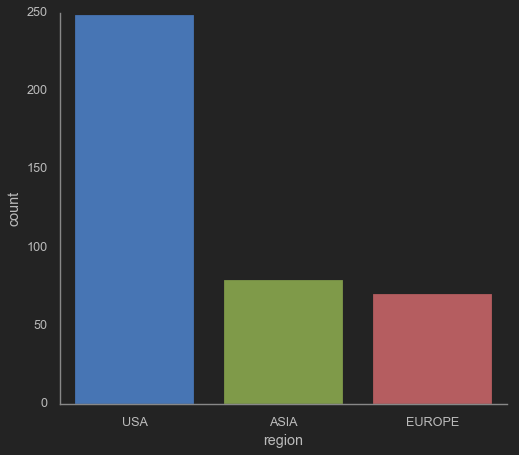

In [332]:
sns.countplot(df.region)
sns.despine()

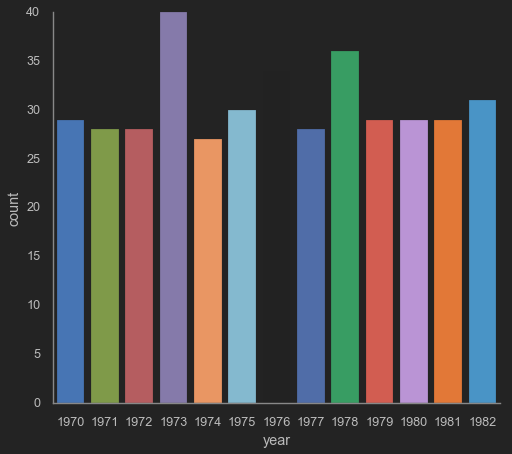

In [333]:
sns.countplot(df.year)
sns.despine()

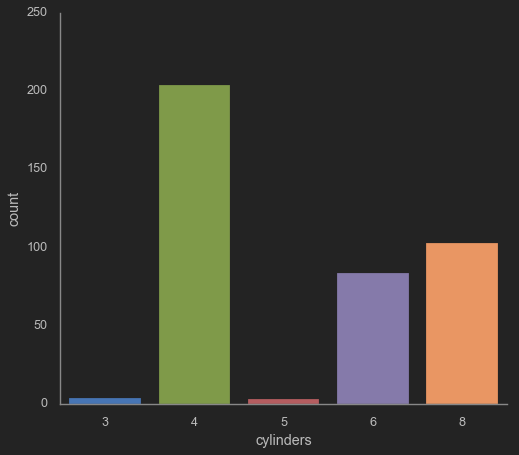

In [398]:
sns.countplot(df.cylinders)
sns.despine()

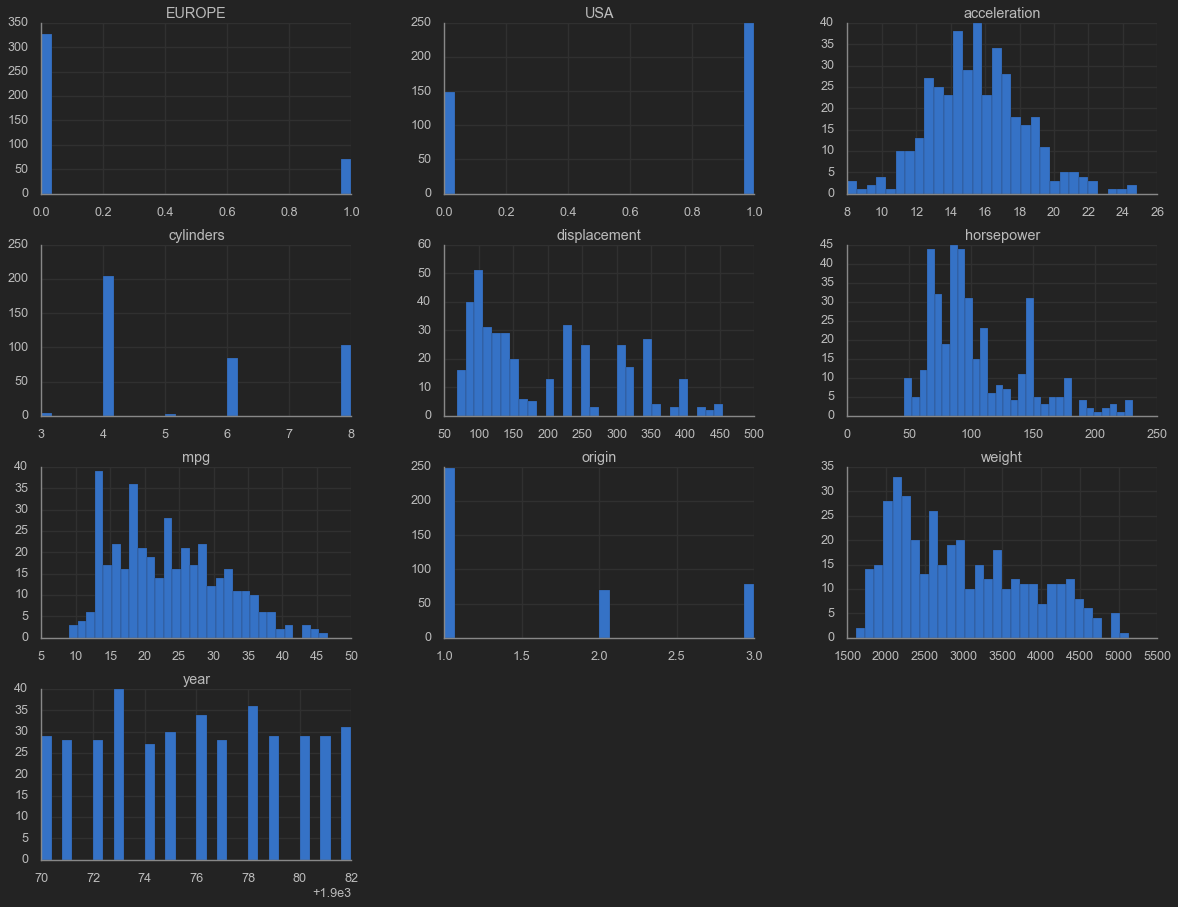

In [303]:
df.hist(bins=30, figsize=(20,15))
sns.despine()

- Some historgams are tail heavy. It can make it harder for some Machine Learning algorithms to detect patterns. We will try to transforms these features to make them more normally distributed.
- Features are distributed on the same scale. Further scaling?

In [198]:
df.cylinders.value_counts() / len(df.cylinders)

4    0.512563
8    0.258794
6    0.211055
3    0.010050
5    0.007538
Name: cylinders, dtype: float64

In [338]:
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name,company,region
0,18.0,8,307.0,130.0,3504.0,12.0,1970,1,Chevrolet Chevelle Malibu,Chevrolet,USA
1,15.0,8,350.0,165.0,3693.0,11.5,1970,1,Buick Skylark 320,Buick,USA
2,18.0,8,318.0,150.0,3436.0,11.0,1970,1,Plymouth Satellite,Plymouth,USA
3,16.0,8,304.0,150.0,3433.0,12.0,1970,1,Amc Rebel Sst,AMC,USA
4,17.0,8,302.0,140.0,3449.0,10.5,1970,1,Ford Torino,Ford,USA


## More Feature engineering 

#### Impute missing values for `horsepower` with median value

In [252]:
imputer = SimpleImputer(strategy='mean')
horsepower_imputed = imputer.fit_transform(df_train['horsepower'].values.reshape(-1, 1))
df_train['horsepower'] = horsepower_imputed

#### Standardize continous features

In [271]:
continuous_features = ['displacement',
                       'horsepower',
                       'weight',
                       'acceleration',]
std_sc = StandardScaler()
std_values = std_sc.fit_transform(df_train[continuous_features])
df_std = pd.DataFrame(std_values, columns=continuous_features)


/Users/Corentin/anaconda3/envs/auto-mpg/lib/python3.6/site-packages/numpy/lib/histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/Users/Corentin/anaconda3/envs/auto-mpg/lib/python3.6/site-packages/numpy/lib/histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


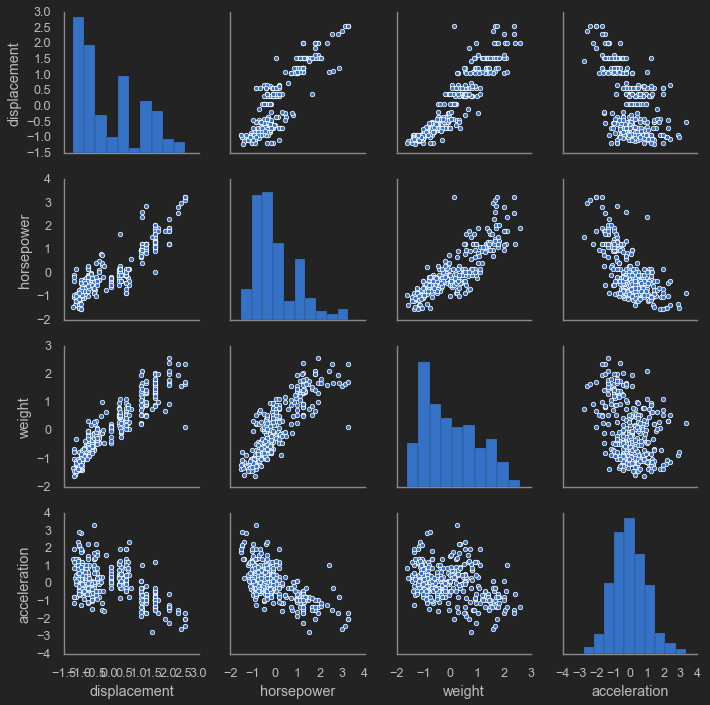

In [272]:
sns.pairplot(df_std)


In [277]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

In [341]:
X_train = df_train.drop('mpg', axis=1)
y_train = df_train['mpg']

In [352]:
continuous_features = ['displacement',
                       'horsepower',
                       'weight',
                       'acceleration',]
# categorical features
ordinal_features = ['cylinders',
                    'year',]

nominal_features = ['region']

cont_pipeline = Pipeline([
    ('imputer_cont', SimpleImputer(strategy='mean')),
    ('std_scaler_cont', StandardScaler()),
])

ord_pipeline = Pipeline([
    ('imputer_ord', SimpleImputer(strategy='most_frequent')),
    ('std_scaler_ord', StandardScaler()),
])

full_pipeline = ColumnTransformer([
    ('cont', cont_pipeline, cont_features),
    ('ord', ord_pipeline, ordinal_features),
    ('nom', OneHotEncoder(), nominal_features),
])

X_train_processed_values = full_pipeline.fit_transform(X_train)

/Users/Corentin/anaconda3/envs/auto-mpg/lib/python3.6/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/Users/Corentin/anaconda3/envs/auto-mpg/lib/python3.6/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


In [356]:
region_ohe_features = list(full_pipeline.named_transformers_['nom'].get_feature_names())
X_train_processed = pd.DataFrame(X_train_processed_values, columns=cont_features+ordinal_features+region_ohe_features)
# drop one of the ohe features to limit correlations in the data set
X_train_processed.drop('x0_EUROPE', axis=1, inplace=True)

In [363]:
X_train_processed.join(y_train).to_csv('../data/processed/df_train_processed.csv')